# BASICS OF PYTHON | SESSION 5

---
Francesco Carminati| October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [87]:
import pandas as pd
import numpy as np

In [88]:
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded)) # get the uploaded file name

data = pd.read_csv(filename)

Saving BoP_data_Spotify.csv to BoP_data_Spotify (2).csv


# 2.&nbsp;Data Cleaning (overview)

In [89]:
print(data.head(5))             #print all the attributes of the dataframe
print("\n============================ DATA SHAPE ============================\n")
print(data.shape)
print("\n============================ DATA INFO ============================\n")
print(data.info())
print("\n============================ DATA DESCRIPTION ============================\n")
print(data.describe())

   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1   

# 3.&nbsp;Data Cleaning (interpretability)

In [127]:
# @title README
'''
IPOTESI:
1. oglio trovare una correlazione tra le canzoni che piacciono di più e la loro durata in minuti
2. voglio trovare una correlazione tra l'energia delle canzoni e la loro ballabilità (ev. anche con il bpm)
3. voglio capire quale artista viene ascoltato di più e se questo è anche l'artista con le canzoni più ballabili
'''

"\nIPOTESI:\n1. oglio trovare una correlazione tra le canzoni che piacciono di più e la loro durata in minuti\n2. voglio trovare una correlazione tra l'energia delle canzoni e la loro ballabilità (ev. anche con il bpm)\n3. voglio capire quale artista viene ascoltato di più \n"

In [128]:
data2 = data.copy()

In [129]:
data2 = data2.rename(columns={'target': 'pleasantness'})

In [130]:
data2['duration_ms'] = (data2['duration_ms'] / 60000).round(2)  #convert ms to min
data2 = data2.rename(columns={'duration_ms': 'duration_min'})   #rename column
'''
print(data.head(5))
print(data2.head(5))  '''

'\nprint(data.head(5))   \nprint(data2.head(5))  '

In [131]:
data2['tempo'] = data2['tempo'].round().astype(int)
#i'm not a musiscian so idk if rounding the tempo is a good thing but...
data2 = data2.rename(columns={'tempo': 'bpm'})  #rename it in bmp to dont misunderstood
'''
print(data.head(5))
print(data2.head(5))'''

'\nprint(data.head(5))\nprint(data2.head(5))'

# 4.&nbsp;Data Cleaning (reduction)

In [132]:
data2.drop(['Unnamed: 0', 'acousticness', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'time_signature', 'valence', 'song_title'], axis=1, inplace=True)

#still remain a column 'unnamed:0' probably for an error during the importation of the csv
#I removed it now but with more time I would have fixed it elsewhere

print(data.shape)
print(data2.shape) #check

(2017, 17)
(2017, 6)


# 5.&nbsp;Data Cleaning (noisy data)

In [133]:
data2.sort_values("duration_min", axis = 0, ascending = False)  #check if all songs have a 'normal' duration (not too long or too short)
#the duration is already expressed in int64 type's values so i dont have to fix it

,danceability,duration_min,energy,bpm,pleasantness,artist
1535,0.447,16.74,0.1630,75,0,Joshua Redman
695,0.907,14.17,0.6430,125,1,Celeda
819,0.376,13.75,0.8010,153,1,"Crosby, Stills, Nash & Young"
1603,0.295,13.07,0.0918,99,0,Felix Mendelssohn
1565,0.421,12.72,0.0967,77,0,Branford Marsalis
...,...,...,...,...,...,...
936,0.555,0.87,0.7590,192,1,Chris Bear
1583,0.876,0.86,0.3010,69,0,The Kids Band
1591,0.941,0.79,0.2560,110,0,Tumble Tots
1436,0.466,0.28,0.9430,113,0,Various Artists


In [134]:
if (data2['bpm'] == 0).any():                                   #check if all songs have a 'normal' BPM
    print("Ci sono valori uguali a 0 nella colonna.")           #(any bpm !=0 (except nan values) are good
else:
    print("Non ci sono valori uguali a 0 nella colonna.")

Non ci sono valori uguali a 0 nella colonna.


# 6.&nbsp;Data Cleaning (completeness)

In [135]:
print(data2.isnull().sum())

danceability    0
duration_min    0
energy          0
bpm             0
pleasantness    0
artist          0
dtype: int64


# 7.&nbsp;Data Exploring


In [136]:
# For this part of the code i want to kown what artist is the favourite of the listener
artist_counts = data2['artist'].value_counts()

most_common_artist = artist_counts.idxmax()
most_common_artist_count = artist_counts.max()

print(f"L'artista più ascoltato è '{most_common_artist}' con {most_common_artist_count} ascolti.")

L'artista più ascoltato è 'Drake' con 16 ascolti.


In [137]:
# Now i want to know what artist make the most danceable songs...
# maybe this knowledge will help later to understand better the analysis
# (if the most danceable is also the most listened whe can infer something)

data2.groupby('artist')['danceability'].mean()

,danceability
artist,
!!!,0.858000
*NSYNC,0.650250
10cm,0.868000
2 Chainz,0.853667
2 LIVE CREW,0.895000
...,...
tobyMac,0.674000
권나무 Kwon Tree,0.792000
도시총각 Dosichonggak,0.741000


# 8.&nbsp;Data Analysis

In [140]:
correlation_hypothesis_1 = data2.drop(columns=['artist'])
print(correlation_hypothesis_1.head(5))
correlation_hypothesis_1.corr().round(2)

   danceability  duration_min  energy  bpm  pleasantness
0         0.833          3.41   0.434  150             1
1         0.743          5.45   0.359  160             1
2         0.838          3.10   0.412   75             1
3         0.494          3.32   0.338   86             1
4         0.678          6.55   0.561  174             1


,danceability,duration_min,energy,bpm,pleasantness
danceability,1.00,0.00,0.04,-0.14,0.18
duration_min,0.00,1.00,-0.14,-0.08,0.15
energy,0.04,-0.14,1.00,0.17,0.04
bpm,-0.14,-0.08,0.17,1.00,0.03
pleasantness,0.18,0.15,0.04,0.03,1.00


# 9.&nbsp;Data Visualization

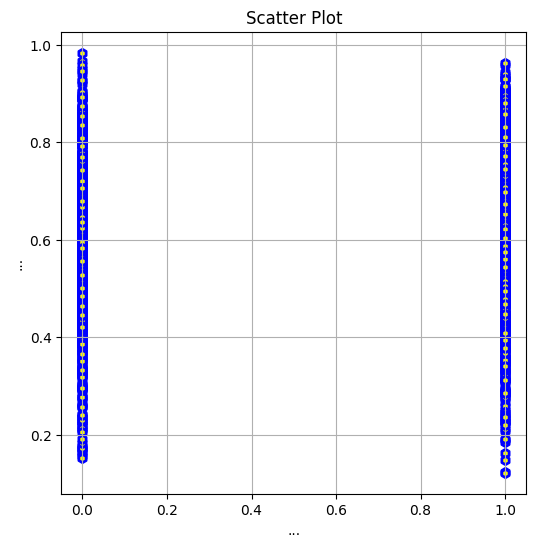

In [146]:
import matplotlib.pyplot as plt

x = data2['pleasantness']
y = data2['danceability']

plt.figure(figsize=(6,6))

plt.scatter(x, y, c='yellow', linewidths=2, marker='h', edgecolors='blue')
plt.grid(True)

plt.title('Scatter Plot')
plt.xlabel('...')
plt.ylabel('...')

plt.show()

In [150]:
#i'm noob whit stats and probably he doesn't like to dance

# 10.&nbsp;Data Exporting